In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Loading Data :

In [2]:
df = pd.read_csv(r'F:\Data Science Notes\Project\StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Data Exploration :

In [3]:
df.shape

(6607, 20)

**In this dataset we have 6607 Rows & 20 Columns.**

In [4]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

**All the columns are of correct DataType.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**In this DataSet :**
  - Index starts from 0 upto 6606 making a total of 6607 entries.
  - we have 20 columns with index starting from 0 to 19.
  - Out of 20 columns : 13 are of object datatype, 7 are of int datatype.
  - Columns : Teacher_Quality, Parental_Education_Level, Distance_from_Home have some **null values.**  

In [6]:
df.columns.tolist()

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

**Converting Columns in List to categorize them in Continuous, Discrete_Count & Discrete_Categorical.**

In [7]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [8]:
num_cols=df.select_dtypes(include='number').columns
num_cols

conti_cols = ["Hours_Studied", "Attendance", "Previous_Scores", "Exam_Score"]
count_cols = ["Sleep_Hours", "Tutoring_Sessions", "Physical_Activity"]

print(conti_cols)
print(count_cols)

['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']
['Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']


**We have 4 Continuous Variables , 3 Discrete_Count Variables & 13 Discrete_Categorical Variables.**

# Data Wrangling :

**Understanding Each Column.**

In [9]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


**Observation :**

 - **For Continuous Columns :**

   - **For Hours_Studied Column :** 
     - Mean Value   = 19.97 i.e Students studied on an avg of ~20 Hours per week or 3 hours per day.
     - Mode Value   = 20.00 i.e Max number of students study 20 Hours per week. 
     - Median Value = 20.00 i.e 50% Students Study Less than 20 Hours per week & 50% Students Study more than 20 Hours per week.
     - Min Value    = 1.00  i.e There is a Student who Study only for 1 Hour a week.
     - Max Value    = 44.00 i.e There is a Student who Study for 44 Hours per week or ~6 Hours per day.
    
   - **For Attendance Column :** 
     - Mean Value   = 79.97 i.e On an avg students attendance is of ~80%.
     - Mode Value   = 67.00 i.e Max number of students attendance is of 67%.
     - Median Value = 80.00 i.e 50% Students have attendance Less than 80% & 50% Students Study have attendance more than 80%.
     - Min Value    = 60.00  i.e Minimum attendance of student is 60%.
     - Max Value    = 100.00 i.e Maximum attendance of student is 100%.
    
   - **For Previous_Scores Column :**
     - Mean Value   = 75.07 i.e On an avg Student Score 75% in previous exams.
     - Mode Value   = 66.00 i.e Max number of students Score 66% in previous exams. 
     - Median Value = 75.00 i.e 50% Students Score Less than 75% & 50% Students Score more than 75% in previous exams.
     - Min Value    = 50.00  i.e Minimum Score of student is 50% in previous exam.
     - Max Value    = 100.00 i.e Maximum Score of student is 100% in previous exam.
    
   - **For Exam_Score Column :**
     - Mean Value   = 67.23 i.e In Finals students on an avg Score ~67% Hours.
     - Mode Value   = 68.00 i.e Max number of students Score 68% in Finals. 
     - Median Value = 67.00 i.e 50% Students Score Less than 67% & 50% Students Score more than 67%.
     - Min Value    = 55.00  i.e Minimum Score in Finals is 55%.
     - Max Value    = 101.00 which is a Outlier because max score can't exceed 100%.

In [10]:
df[conti_cols].skew() # for numerical columns.

Hours_Studied      0.013499
Attendance         0.013666
Previous_Scores   -0.003737
Exam_Score         1.644808
dtype: float64

**Observation :**
  - Every Column Data is : Normally Distribution.
  - Except for Exam_Score Column which is : Right Skewed.

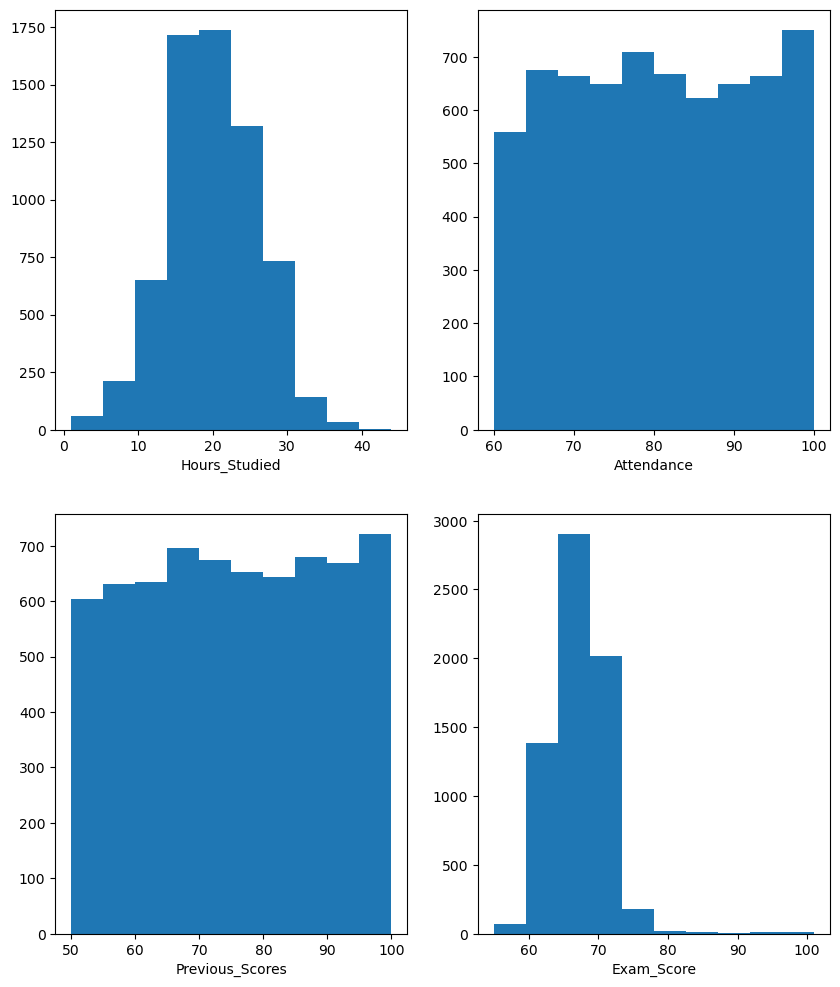

In [11]:
# Cross Checking skewness via Histogram for continuous columns only.

plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.hist(df['Hours_Studied'])
plt.xlabel('Hours_Studied')

plt.subplot(2,2,2)
plt.hist(df['Attendance'])
plt.xlabel('Attendance')

plt.subplot(2,2,3)
plt.hist(df['Previous_Scores'])
plt.xlabel('Previous_Scores')

plt.subplot(2,2,4)
plt.hist(df['Exam_Score'])
plt.xlabel('Exam_Score')
plt.show()

**Observation :**
  - Every Column Data is : Normally Distribution.
  - Except for **Exam_Score** Column which is : **Right Skewed**.

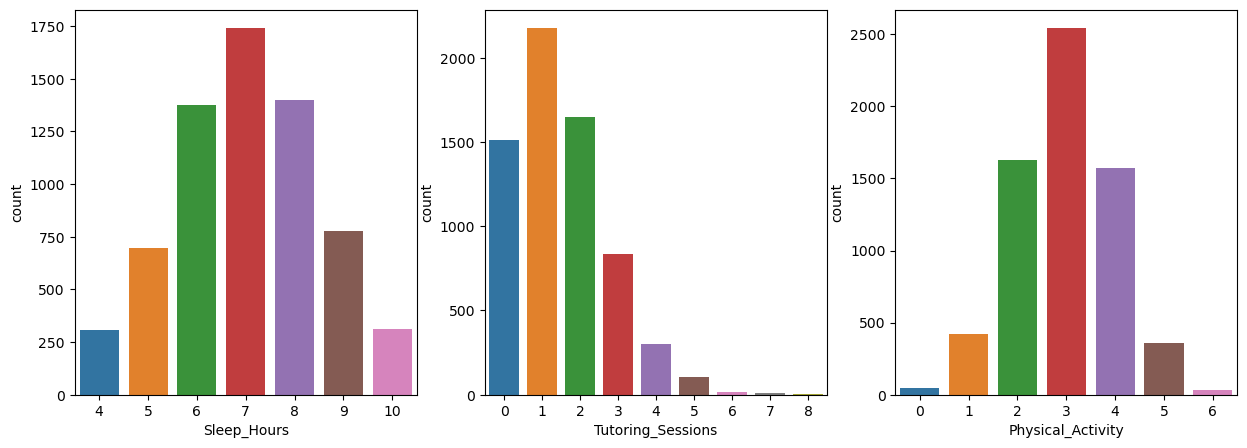

In [12]:
# Checking frequency of Count Columns:

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x = df['Sleep_Hours'])
plt.xlabel('Sleep_Hours')

plt.subplot(1,3,2)
sns.countplot(x = df['Tutoring_Sessions'])
plt.xlabel('Tutoring_Sessions')

plt.subplot(1,3,3)
sns.countplot(x = df['Physical_Activity'])
plt.xlabel('Physical_Activity')

plt.show()

**Observation:**
  - For Sleep_Hours Column :
    - ~70% of Students takes sleep of around 6-8 hours per night. 
    
  - For Tutoring_Sessions Column :
    - ~50% of Students takes between 1-2 tutoring session per month.
    
  - For Physical_Activity Column :
    - ~84% number of Students do 2-4 hours of Physical Activity on an Avg.

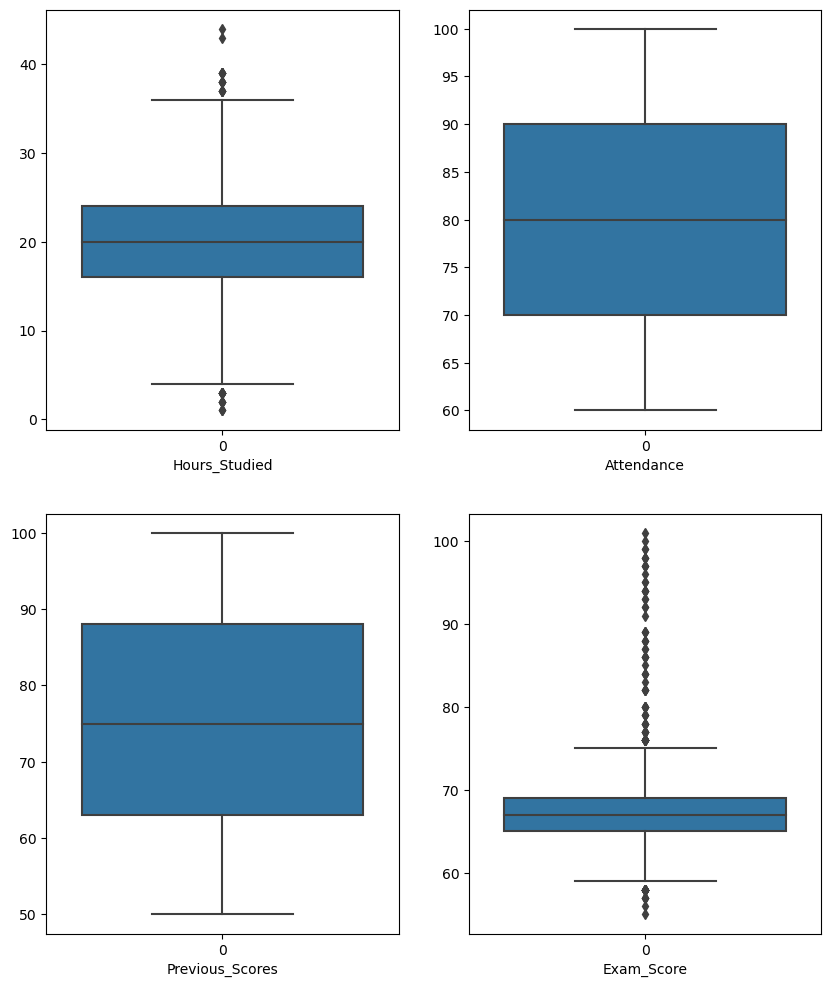

In [13]:
# Checking Outliers for continuous columns only :

plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
sns.boxplot(df['Hours_Studied'])
plt.xlabel('Hours_Studied')

plt.subplot(2,2,2)
sns.boxplot(df['Attendance'])
plt.xlabel('Attendance')

plt.subplot(2,2,3)
sns.boxplot(df['Previous_Scores'])
plt.xlabel('Previous_Scores')

plt.subplot(2,2,4)
sns.boxplot(df['Exam_Score'])
plt.xlabel('Exam_Score')

plt.show()

**Observation:**
  - We have **Outliers** in **Hours_Studied** & **Exam_Score Column**.
  - Don't have Outliers in Attendance & Previous_Scores Column.

['Low' 'Medium' 'High']
3
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64


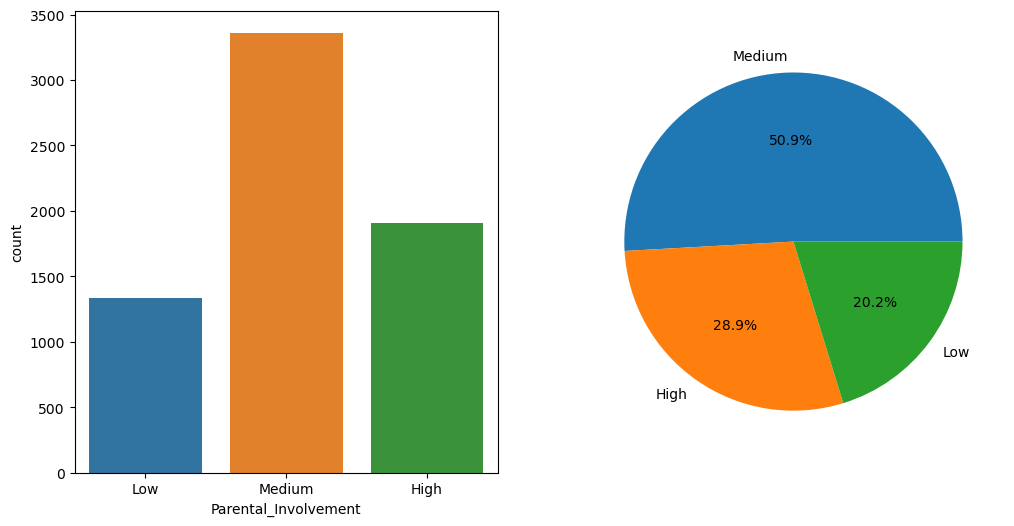

In [14]:
print(df["Parental_Involvement"].unique())
print(df["Parental_Involvement"].nunique())
print(df["Parental_Involvement"].value_counts())

pi_counts = df["Parental_Involvement"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Parental_Involvement'])
plt.xlabel('Parental_Involvement')

plt.subplot(1,2,2)
plt.pie(pi_counts, labels = pi_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - We have 3 Unique Levels of Parents Involvement in Student's Education : Low , Medium & High.
  - ~50% Parents involvement in Student's Education is of Medium Level.
  - ~29% Parents involve at High level in Students Education.
  - Rest Students have Low Level of Parents Involvement in their Education.

['High' 'Medium' 'Low']
3
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


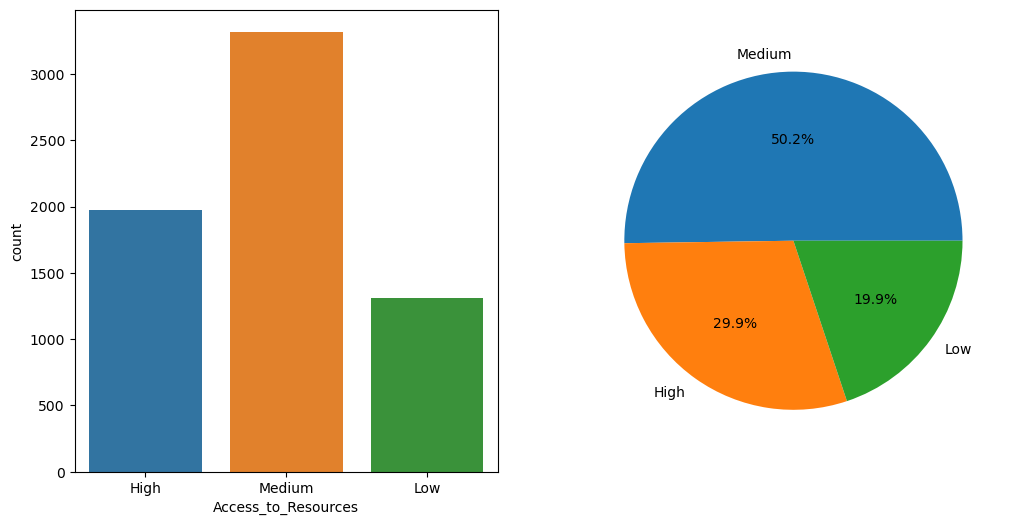

In [15]:
print(df["Access_to_Resources"].unique())
print(df["Access_to_Resources"].nunique())
print(df["Access_to_Resources"].value_counts())

atr_counts = df["Access_to_Resources"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Access_to_Resources'])
plt.xlabel('Access_to_Resources')

plt.subplot(1,2,2)
plt.pie(atr_counts, labels = atr_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - we have 3 Unique Level Of Educational Resource Availability : Low, Medium & High.
  - ~50% Students have Medium Level of Educational Resource Availabilty.
  - ~30% Students have High Level Availabilty of Educational Resources.
  - Rest have Low Level of Educational Resource Availabilty.

['No' 'Yes']
2
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64


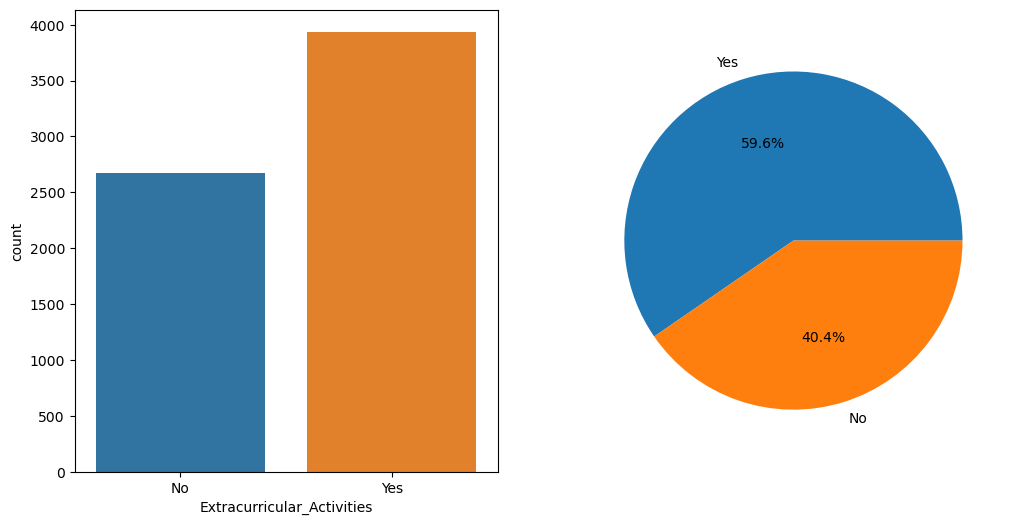

In [16]:
print(df["Extracurricular_Activities"].unique())
print(df["Extracurricular_Activities"].nunique())
print(df["Extracurricular_Activities"].value_counts())

ea_counts = df["Extracurricular_Activities"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Extracurricular_Activities'])
plt.xlabel('Extracurricular_Activities')

plt.subplot(1,2,2)
plt.pie(ea_counts, labels = ea_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - we have 2 Unique Values in Extracurricular Activities Column : Yes & No.
  - ~60% of Students take part in Extracurricular Activities.
  - Rest Dont participate in any Extracurricular Activities.

['Low' 'Medium' 'High']
3
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64


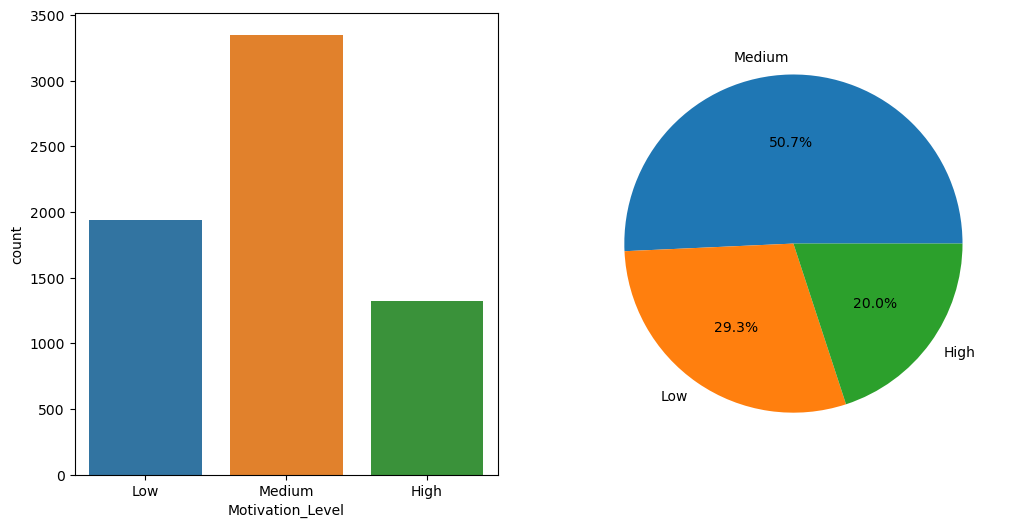

In [17]:
print(df["Motivation_Level"].unique())
print(df["Motivation_Level"].nunique())
print(df["Motivation_Level"].value_counts())

ml_counts = df["Motivation_Level"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Motivation_Level'])
plt.xlabel('Motivation_Level')

plt.subplot(1,2,2)
plt.pie(ml_counts, labels = ml_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - We have 3 unique Level of Motivation of Students : Low, Medium & High.
  - ~50% Students have Medium Level of Motivation.
  - ~30% Students have Low Motivation Level.
  - Rest Students are Highly Motivated.

['Yes' 'No']
2
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64


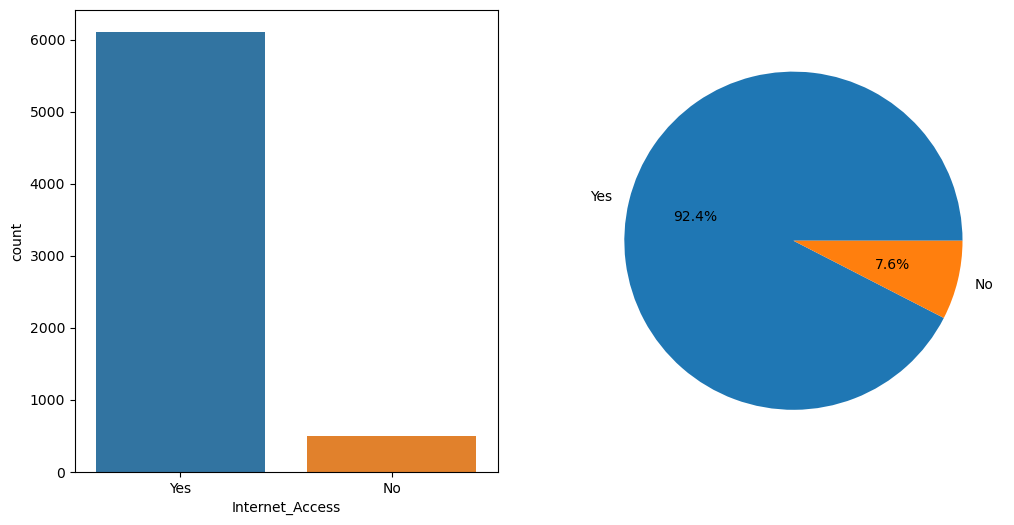

In [18]:
print(df["Internet_Access"].unique())
print(df["Internet_Access"].nunique())
print(df["Internet_Access"].value_counts())

ia_counts = df["Internet_Access"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Internet_Access'])
plt.xlabel('Internet_Access')

plt.subplot(1,2,2)
plt.pie(ia_counts, labels = ia_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - we have 2 Unique Values in Internet_Access Coolumn : Yes & No.
  - ~92% Students have Accessability to Internet.

['Low' 'Medium' 'High']
3
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64


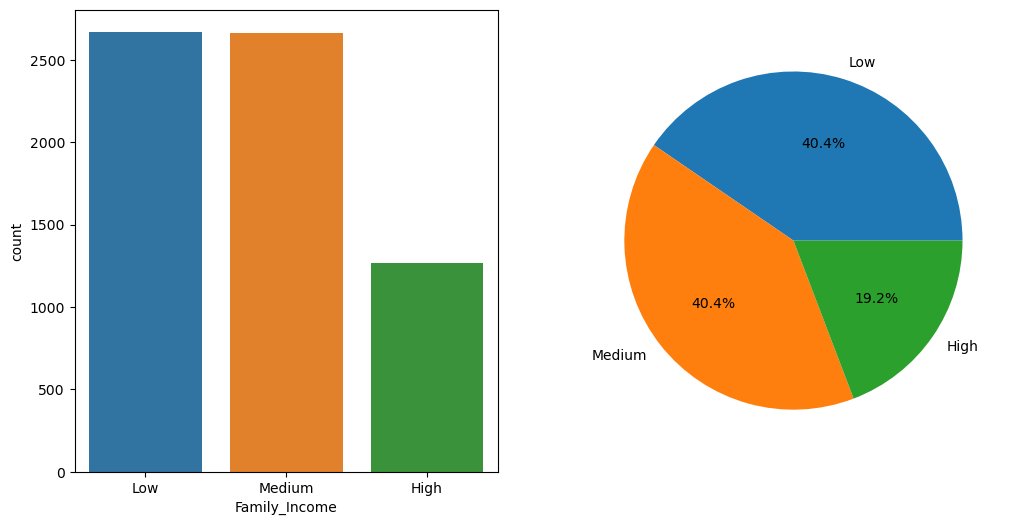

In [19]:
print(df["Family_Income"].unique())
print(df["Family_Income"].nunique())
print(df["Family_Income"].value_counts())

fi_counts = df["Family_Income"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Family_Income'])
plt.xlabel('Family_Income')

plt.subplot(1,2,2)
plt.pie(fi_counts, labels = fi_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - We have 3 Unique Level of Families Income : Low, Medium & High
  - ~80% Students comes from Low & Medium Income Family.

['Medium' 'High' 'Low' nan]
3
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64


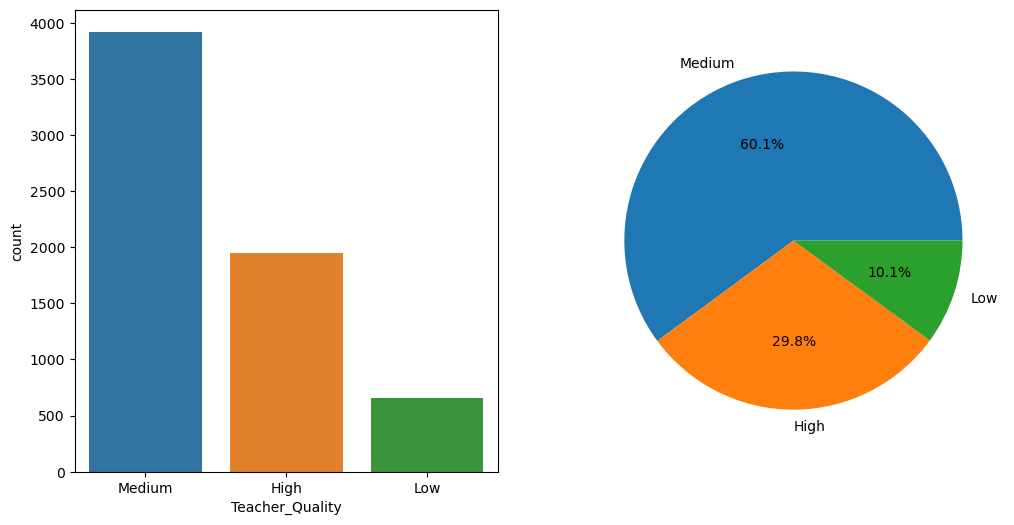

In [20]:
print(df["Teacher_Quality"].unique())
print(df["Teacher_Quality"].nunique())
print(df["Teacher_Quality"].value_counts())

tq_counts = df["Teacher_Quality"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Teacher_Quality'])
plt.xlabel('Teacher_Quality')

plt.subplot(1,2,2)
plt.pie(tq_counts, labels = tq_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - We have 3 Unique Levels of Quality of Teachers : Low, Medium & High.
  - We have some **NULL** Values in Teacher_Quality Column.
  - ~60% Students get Medium Quality Level of Teacher.
  - ~30% Students have access to High Quality Level of Teacher.

['Public' 'Private']
2
School_Type
Public     4598
Private    2009
Name: count, dtype: int64


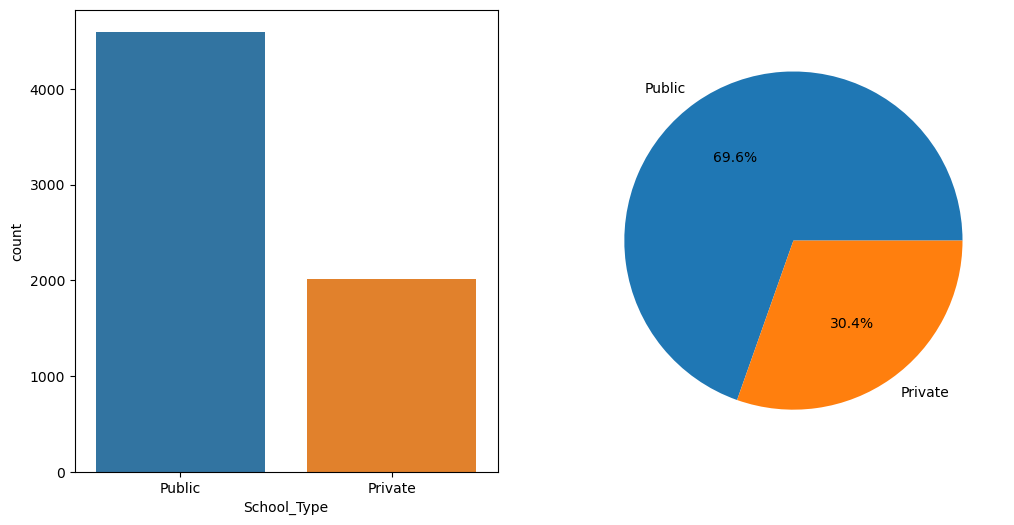

In [21]:
print(df["School_Type"].unique())
print(df["School_Type"].nunique())
print(df["School_Type"].value_counts())

st_counts = df["School_Type"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['School_Type'])
plt.xlabel('School_Type')

plt.subplot(1,2,2)
plt.pie(st_counts, labels = st_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - We have 2 Unique Values in School_Type Column : Public & Private.
  - ~70% Students studies in Public Schools.

['Positive' 'Negative' 'Neutral']
3
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64


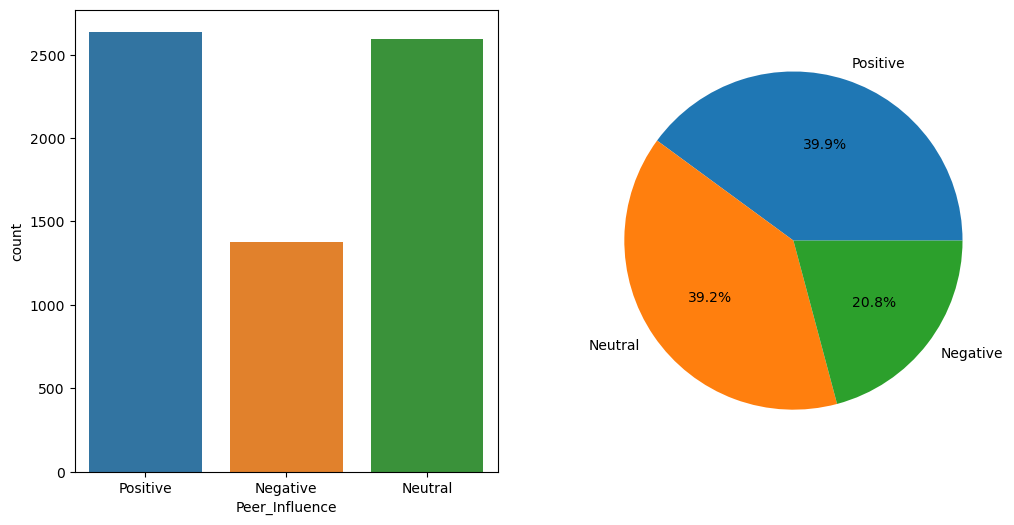

In [22]:
print(df["Peer_Influence"].unique())
print(df["Peer_Influence"].nunique())
print(df["Peer_Influence"].value_counts())

peer_i_counts = df["Peer_Influence"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Peer_Influence'])
plt.xlabel('Peer_Influence')

plt.subplot(1,2,2)
plt.pie(peer_i_counts, labels = peer_i_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - We have 3 Unique Types of Peer Influence : Positive, Negative and Neutral.
  - ~80% Students have Positive or Neutral Peer Influence on Academic Performance.
  - ~20% Students have Negative Peer Influence on Academic Performance. 

['No' 'Yes']
2
Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64


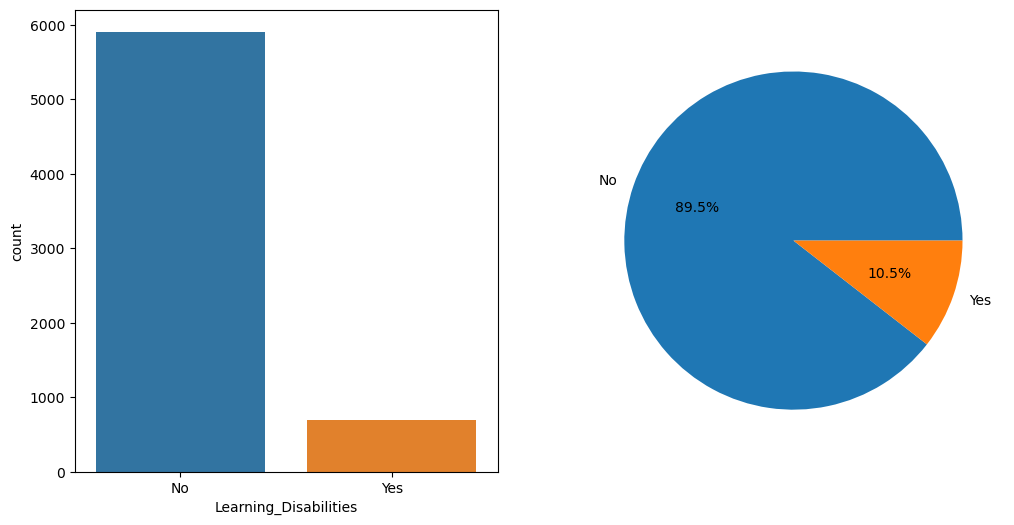

In [23]:
print(df["Learning_Disabilities"].unique())
print(df["Learning_Disabilities"].nunique())
print(df["Learning_Disabilities"].value_counts())

ld_counts = df["Learning_Disabilities"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Learning_Disabilities'])
plt.xlabel('Learning_Disabilities')

plt.subplot(1,2,2)
plt.pie(ld_counts, labels = ld_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - We have 2 Unique Values in Learning_Disabilities Column : Yes & No.
  - ~90% Students Don't have any Learning Disability.
  - 10% Students have Learning Disability.

['High School' 'College' 'Postgraduate' nan]
3
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64


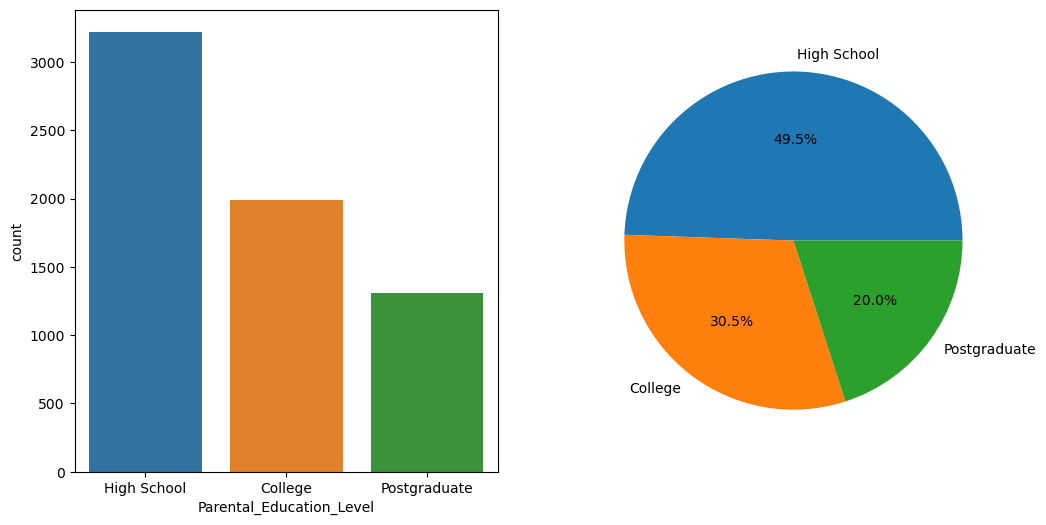

In [24]:
print(df["Parental_Education_Level"].unique())
print(df["Parental_Education_Level"].nunique())
print(df["Parental_Education_Level"].value_counts())

pel_counts = df["Parental_Education_Level"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Parental_Education_Level'])
plt.xlabel('Parental_Education_Level')

plt.subplot(1,2,2)
plt.pie(pel_counts, labels = pel_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - We have 3 Levels of Parents Highest Education Level : High School, College & Post-Graduate.
  - we have some **NULL** Values in Parental_Education_Level.
  - ~49% of Parents have studied upto High School.
  - ~30% of Parents have highest level of Education upto College Level.
  - Only 20% Parents Studied upto Post-Graduate Level.

['Near' 'Moderate' 'Far' nan]
3
Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64


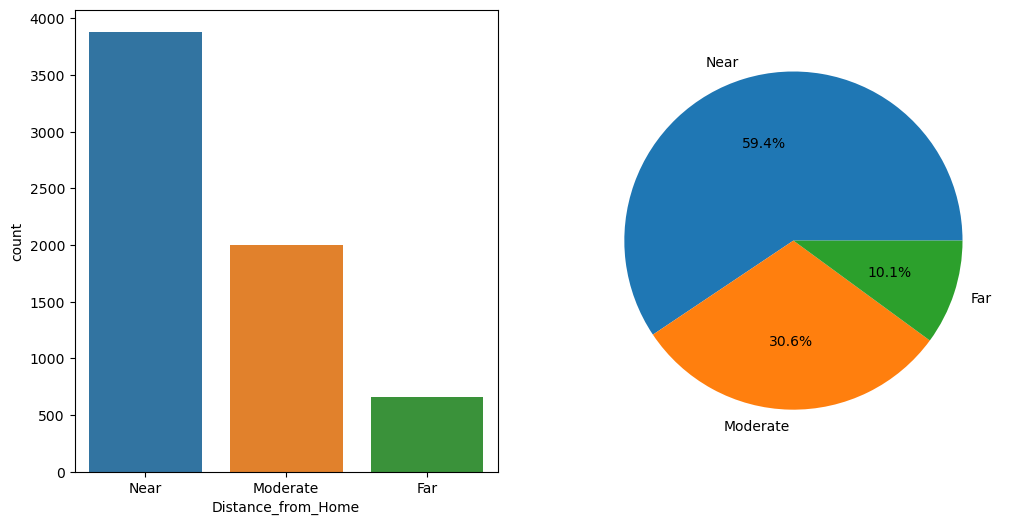

In [25]:
print(df["Distance_from_Home"].unique())
print(df["Distance_from_Home"].nunique())
print(df["Distance_from_Home"].value_counts())

dfh_counts = df["Distance_from_Home"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Distance_from_Home'])
plt.xlabel('Distance_from_Home')

plt.subplot(1,2,2)
plt.pie(dfh_counts, labels = dfh_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - We have 3 Types of Distance between School and Home : Near, Moderate & Far.
  - we have some **NULL** Values in Distance_From_Home Column.
  - ~59% Students have School Near to their Homes.
  - ~30% of students come to School from a Moderate Distance.
  - Only 10% Students comes from Far Distance to School.

['Male' 'Female']
2
Gender
Male      3814
Female    2793
Name: count, dtype: int64


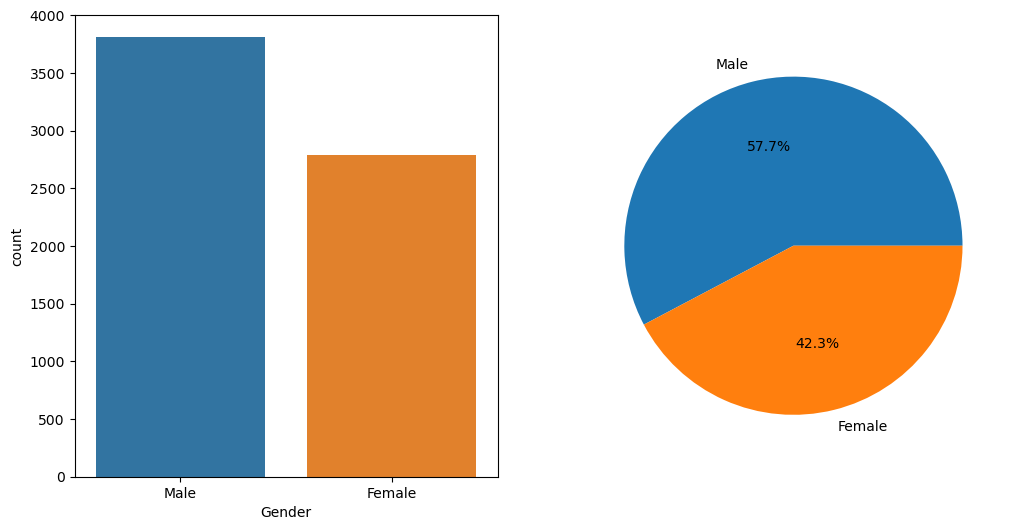

In [26]:
print(df["Gender"].unique())
print(df["Gender"].nunique())
print(df['Gender'].value_counts())

gndr_counts = df["Gender"].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x = df['Gender'])
plt.xlabel('Gender')

plt.subplot(1,2,2)
plt.pie(gndr_counts, labels = gndr_counts.index, autopct = '%1.1f%%')

plt.show()

**Observation:**
  - we have 2 Unique Values in Gender Column : Male & Female.
  - ~58% Students are Males , Rest are Females.

# Data Pre-Processing :

**Data Cleaning**

**1) Checking & Dropping Duplicates**

In [27]:
df.duplicated().sum()

0

**Observation:**
  - In this Dataset We don't have any Duplicated record.

**2) Treating Missing/Null Values**

In [28]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


**Observation:**
- **Columns** : Teacher_Quality, Parental_Education_Level, Distance_from_Home have **NULL values.** 

**Filling Null Values**

In [29]:
df["Teacher_Quality"] = df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0])
df["Parental_Education_Level"] = df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0])
df["Distance_from_Home"] = df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0])

**Observation:**
  - For Discrete DataType Column we replace Null/Missing values with 1st Mode value.

In [30]:
#Rechecking if Missing Values are there
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

**Observation:**
  - Now we Don't have any Null/Missing values in our DataSet.

**3) Extracting & Treating Outliers**

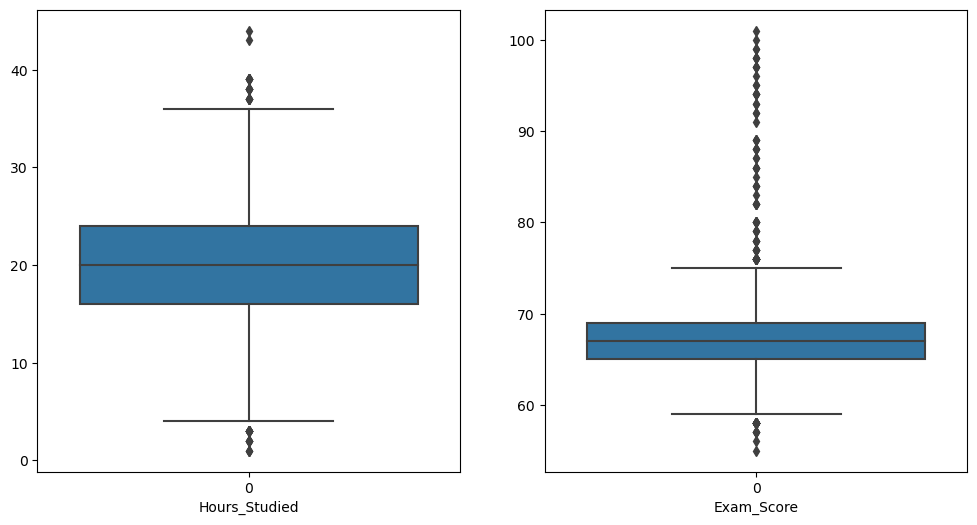

In [31]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df['Hours_Studied'])
plt.xlabel('Hours_Studied')

plt.subplot(1,2,2)
sns.boxplot(df['Exam_Score'])
plt.xlabel('Exam_Score')

plt.show()

**Observation:**
  - We have Outliers in Hours_Studied, Exam_Score & Tutoring_Sessions Column.

In [32]:
df[['Hours_Studied','Exam_Score']].describe()

,Hours_Studied,Exam_Score
count,6607.000000,6607.000000
mean,19.975329,67.235659
std,5.990594,3.890456
min,1.000000,55.000000
25%,16.000000,65.000000
50%,20.000000,67.000000
75%,24.000000,69.000000
max,44.000000,101.000000


In [33]:
Q1_Hours_Studied = 16.000000
print('Q1_HS :' ,Q1_Hours_Studied)
Q3_Hours_Studied = 24.000000
print('Q3_HS :' ,Q3_Hours_Studied)
IQR_Hours_Studied = Q3_Hours_Studied - Q1_Hours_Studied
print('IQR_HS :' ,IQR_Hours_Studied)
LL_Hours_Studied = Q1_Hours_Studied - (1.5 * IQR_Hours_Studied)
print('LL_HS :' ,LL_Hours_Studied)
OL_Hours_Studied = Q3_Hours_Studied + (1.5 * IQR_Hours_Studied)
print('OL_HS :' ,OL_Hours_Studied)

print( )

Q1_Exam_Score = 65.000000
print('Q1_ES :' ,Q1_Exam_Score)
Q3_Exam_Score = 69.000000
print('Q3_ES :' ,Q3_Exam_Score)
IQR_Exam_Score = Q3_Exam_Score - Q1_Exam_Score
print('IQR_ES :' ,IQR_Exam_Score)
LL_Exam_Score = Q1_Exam_Score - (1.5 * IQR_Exam_Score)
print('LL_ES :' ,LL_Exam_Score)
OL_Exam_Score = Q3_Exam_Score + (1.5 * IQR_Exam_Score)
print('OL_ES :' ,OL_Exam_Score)

Q1_HS : 16.0
Q3_HS : 24.0
IQR_HS : 8.0
LL_HS : 4.0
OL_HS : 36.0

Q1_ES : 65.0
Q3_ES : 69.0
IQR_ES : 4.0
LL_ES : 59.0
OL_ES : 75.0


In [34]:
# Extracting Outliers :

df[(df['Hours_Studied']<LL_Hours_Studied) | (df['Hours_Studied']>OL_Hours_Studied)]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
209,43,86,High,Medium,Yes,7,97,Medium,Yes,2,Medium,High,Public,Positive,1,No,High School,Near,Female,78
262,1,69,High,Medium,Yes,6,97,Medium,Yes,1,Low,Medium,Public,Positive,3,No,High School,Near,Female,61
478,38,86,Low,High,Yes,7,79,Low,Yes,3,Low,Medium,Public,Negative,3,No,High School,Near,Male,73
1061,3,85,Low,High,No,8,73,Low,Yes,2,Low,Medium,Private,Neutral,3,No,High School,Near,Male,62
1101,3,62,Medium,Low,No,6,67,Medium,Yes,1,Low,Medium,Public,Negative,3,No,High School,Near,Male,55
1539,3,96,High,High,Yes,9,59,Medium,Yes,2,Low,Medium,Public,Negative,3,No,College,Moderate,Female,66
1591,2,84,Low,High,No,8,54,Low,Yes,3,Low,Low,Public,Positive,4,No,High School,Near,Male,62
1615,39,95,Medium,High,Yes,9,54,High,Yes,2,Medium,Medium,Private,Positive,3,No,High School,Moderate,Male,77
1957,39,97,High,High,Yes,10,91,Medium,Yes,2,Low,Medium,Public,Positive,3,No,High School,Moderate,Female,79
1971,2,96,Low,High,Yes,9,77,Medium,Yes,3,Medium,Medium,Public,Neutral,2,No,High School,Far,Female,65


**In Hours_Studied 43 Outliers are there.**

In [35]:
# Index number of Exam Score having 101% which is an outlier.

df['Exam_Score'].idxmax()

1525

In [36]:
df = df.drop(index = 1525)

In [37]:
df[(df['Exam_Score']<LL_Exam_Score) | (df['Exam_Score']>OL_Exam_Score)]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
106,31,100,Medium,Medium,No,7,59,Medium,Yes,2,High,High,Public,Positive,5,No,Postgraduate,Moderate,Male,76
113,35,99,High,High,Yes,7,85,Low,Yes,2,Medium,High,Private,Neutral,2,No,Postgraduate,Near,Female,79
209,43,86,High,Medium,Yes,7,97,Medium,Yes,2,Medium,High,Public,Positive,1,No,High School,Near,Female,78
217,19,70,Medium,Low,No,7,54,High,Yes,0,Medium,Medium,Public,Positive,2,Yes,High School,Moderate,Male,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,28,96,High,Low,Yes,4,98,High,Yes,1,High,High,Public,Positive,3,No,High School,Near,Male,98
6393,16,83,Low,Medium,Yes,8,92,Low,Yes,2,High,High,Public,Positive,4,No,Postgraduate,Near,Female,98
6431,4,60,Medium,Medium,Yes,7,55,Medium,Yes,2,Low,Medium,Private,Neutral,2,No,Postgraduate,Near,Male,58
6522,18,90,High,High,Yes,6,54,Low,Yes,1,Medium,High,Public,Negative,3,No,High School,Near,Female,95


**In Exam_Score 103 Outliers are there.**

**Treating all Outliers using Winsorization Process in which we replace value in such a way :**
  - where any value < lower limit is Replaced with Q1 - (1.5 * IQR)
  - where any value > upper limit is Replaced with Q3 + (1.5 * IQR)

In [38]:
# Treating outliers using Winsorization Process:

df['Hours_Studied'] = df['Hours_Studied'].clip(lower=4.0,upper=36.0)
df['Exam_Score'] = df['Exam_Score'].clip(lower=59.0,upper=75.0)

**Outliers are treated.**

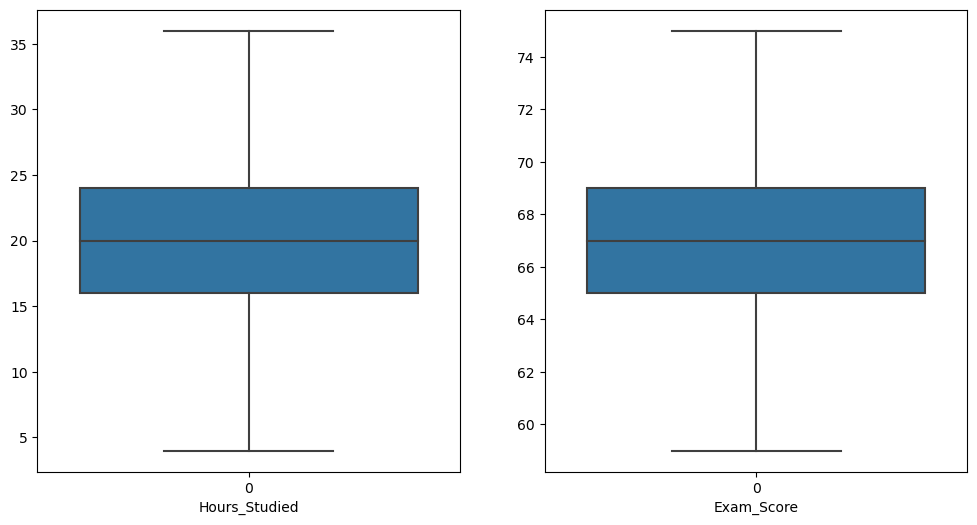

In [39]:
# Rechecking Outliers are there or not:

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df['Hours_Studied'])
plt.xlabel('Hours_Studied')

plt.subplot(1,2,2)
sns.boxplot(df['Exam_Score'])
plt.xlabel('Exam_Score')

plt.show()

**All Outliers are treated using Winsorization Process**
  - where any value < lower limit is Replaced with Q1 - (1.5 * IQR)
  - where any value > upper limit is Replaced with Q3 + (1.5 * IQR)

**4) Checking, Treating Skewness**

Hours_Studied     -0.002809
Attendance         0.013806
Previous_Scores   -0.003464
Exam_Score         0.044583
dtype: float64


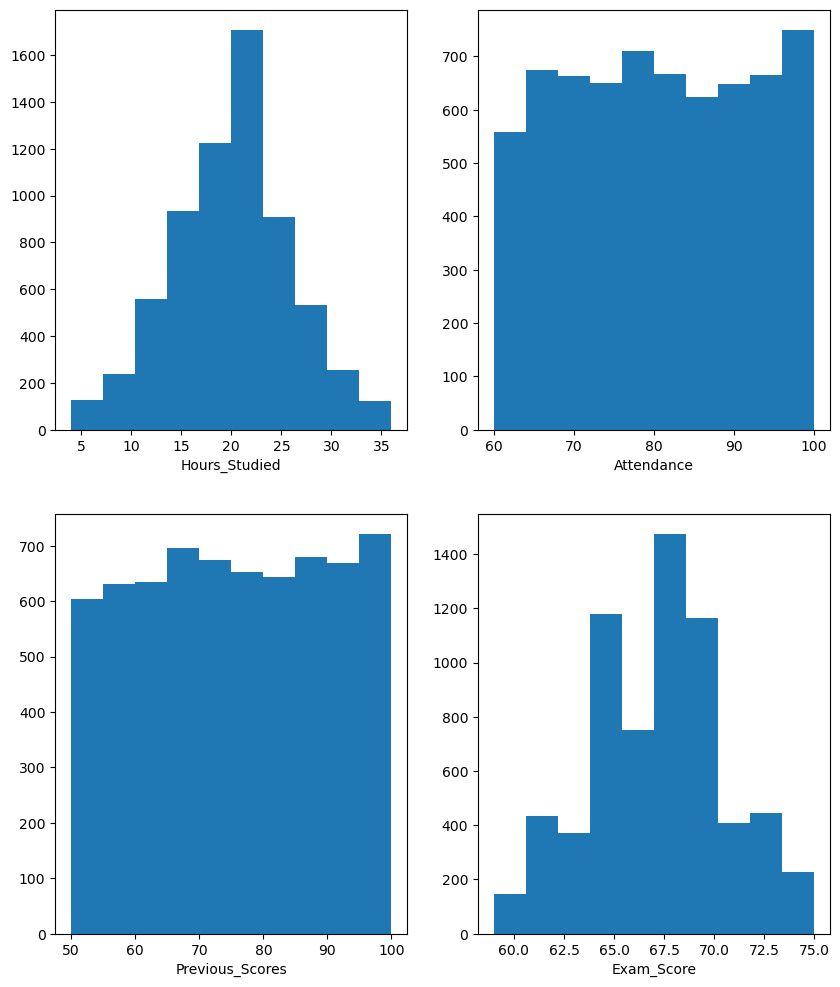

In [40]:
print(df[conti_cols].skew())

plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.hist(df['Hours_Studied'])
plt.xlabel('Hours_Studied')

plt.subplot(2,2,2)
plt.hist(df['Attendance'])
plt.xlabel('Attendance')

plt.subplot(2,2,3)
plt.hist(df['Previous_Scores'])
plt.xlabel('Previous_Scores')

plt.subplot(2,2,4)
plt.hist(df['Exam_Score'])
plt.xlabel('Exam_Score')
plt.show()

**Observation :**
  - Every Column Data is **Normally Distributed.**

# Data Pre-Processing is Completed.

In [41]:
# Converting Cleaned Data to Excel. 

# df.to_excel('Cleaned2.xlsx')

# Data Analysis :

***Relation between Exam_Score & Other Columns.***

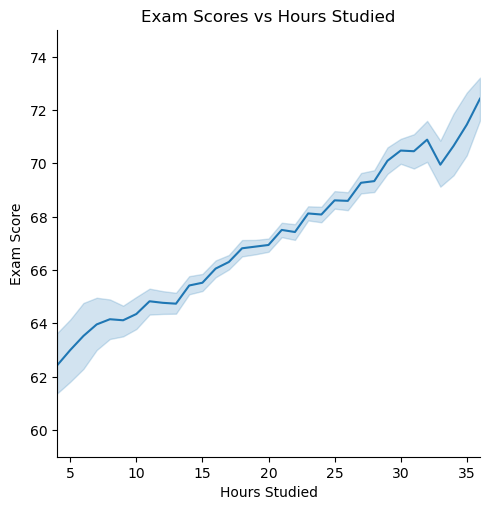

In [42]:
# Exam_Score with Hours_Studied :

# Creating the line plot
sns.relplot(x='Hours_Studied', y='Exam_Score', data=df, kind='line', markers=True, dashes=False)

# Setting the x and y limits to cover the full range of data
plt.xlim(df['Hours_Studied'].min(), df['Hours_Studied'].max())
plt.ylim(df['Exam_Score'].min(), df['Exam_Score'].max())

# Adding labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Exam Scores vs Hours Studied')

# Showing the plot
plt.show()

**As avg study hours Increases , students score in Exams also Increases.**

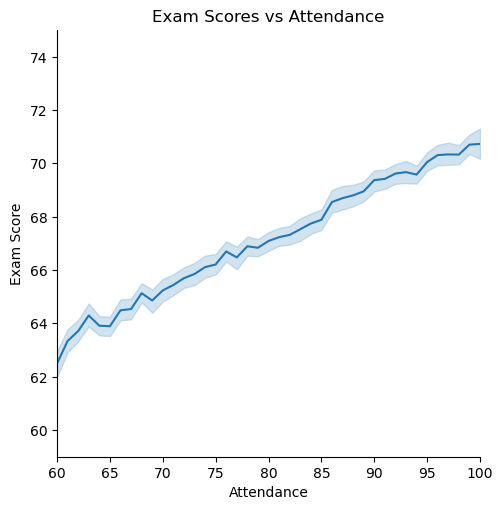

In [43]:
# Exam_Score with Attendance :

# Creating the line plot
sns.relplot(x='Attendance', y='Exam_Score', data=df, kind='line', markers=True, dashes=False)

# Setting the x and y limits to cover the full range of data
plt.xlim(df['Attendance'].min(), df['Attendance'].max())
plt.ylim(df['Exam_Score'].min(), df['Exam_Score'].max())

# Adding labels and title
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Exam Scores vs Attendance')

# Showing the plot
plt.show()

**By attending more number of classes , there is positive impact on marks of students.**

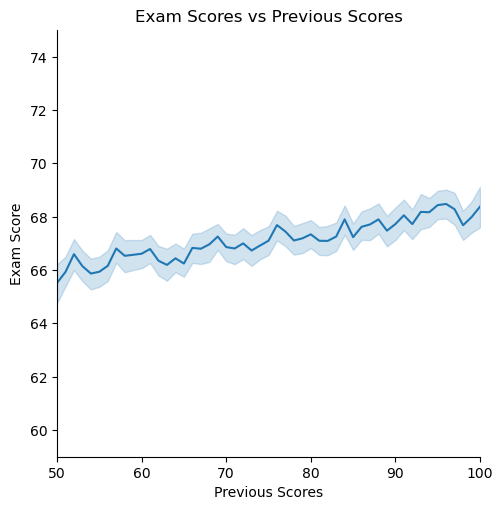

In [44]:
# Exam_Score with Previous_Scores :

# Creating the line plot
sns.relplot(x='Previous_Scores', y='Exam_Score', data=df, kind='line', markers=True, dashes=False)

# Setting the x and y limits to cover the full range of data
plt.xlim(df['Previous_Scores'].min(), df['Previous_Scores'].max())
plt.ylim(df['Exam_Score'].min(), df['Exam_Score'].max())

# Adding labels and title
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.title('Exam Scores vs Previous Scores')

# Showing the plot
plt.show()

**There is not much of effect of previous exam score on students performance in final exam.**

                       count       mean       std   min   25%   50%    75%  \
Parental_Involvement                                                         
High                  1908.0  67.944444  3.307054  59.0  66.0  68.0  70.00   
Low                   1336.0  66.231287  3.344573  59.0  64.0  66.0  68.25   
Medium                3362.0  67.016954  3.314069  59.0  65.0  67.0  69.00   

                       max  
Parental_Involvement        
High                  75.0  
Low                   75.0  
Medium                75.0  


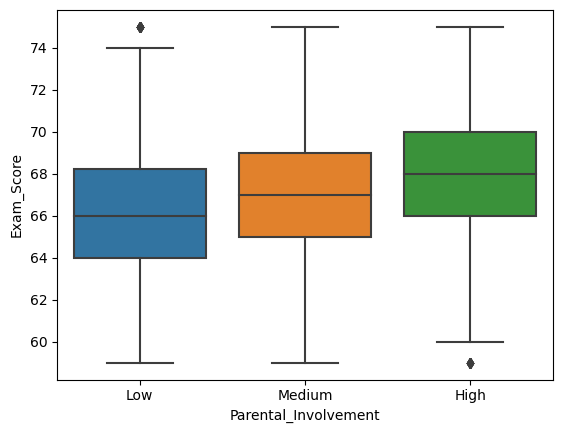

In [45]:
# Exam_Score with Parental_Involvement :

print(df.groupby('Parental_Involvement')['Exam_Score'].describe())

sns.boxplot(x = 'Parental_Involvement', y = 'Exam_Score', data = df)
plt.show()

**Students scores in exams are directly proportional to Parents Involvement in their studies, i.e student who scores high have more parental_involvement.**

                      count       mean       std   min   25%   50%   75%   max
Access_to_Resources                                                           
High                 1975.0  67.955949  3.375456  59.0  66.0  68.0  70.0  75.0
Low                  1313.0  66.147753  3.223075  59.0  64.0  66.0  68.0  75.0
Medium               3318.0  67.018987  3.308835  59.0  65.0  67.0  69.0  75.0


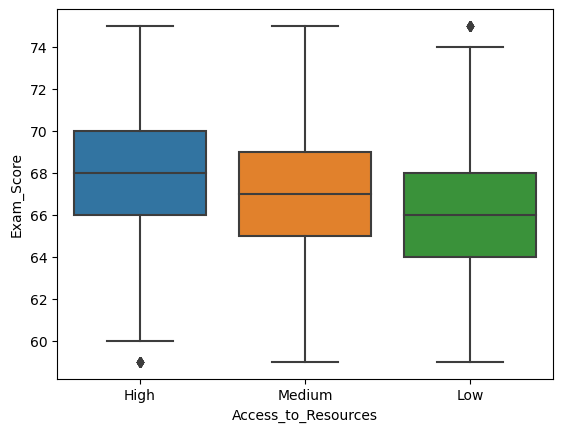

In [46]:
# Exam_Score with Access_to_Resources :

print(df.groupby('Access_to_Resources')['Exam_Score'].describe())

sns.boxplot(x = 'Access_to_Resources', y = 'Exam_Score', data = df)
plt.show()

**Students who have high access to resources scores high in exams, i.e Exam Score is directly proportional to Accessability of Resources.**

                             count       mean       std   min   25%   50%  \
Extracurricular_Activities                                                  
No                          2669.0  66.847883  3.369112  59.0  64.0  67.0   
Yes                         3937.0  67.314453  3.360939  59.0  65.0  67.0   

                             75%   max  
Extracurricular_Activities              
No                          69.0  75.0  
Yes                         70.0  75.0  


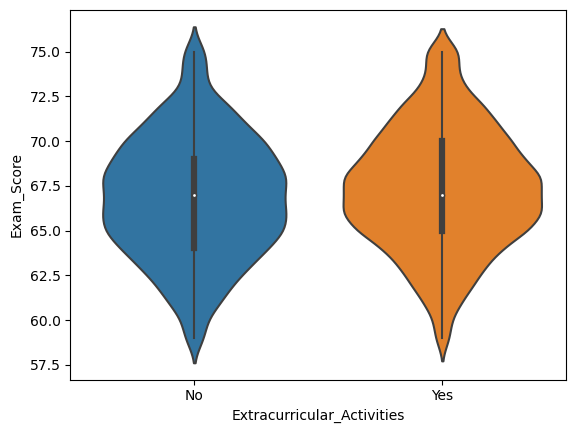

In [47]:
# Exam_Score with Extracurricular_Activities :

print(df.groupby('Extracurricular_Activities')['Exam_Score'].describe())

sns.violinplot(x = 'Extracurricular_Activities', y = 'Exam_Score', data = df)
plt.show()

**Students who takes part in Extracurricular Activities scores good than who don't participate.**

                   count       mean       std   min   25%   50%   75%   max
Motivation_Level                                                           
High              1319.0  67.584534  3.383698  59.0  65.0  67.0  70.0  75.0
Low               1936.0  66.646694  3.405296  59.0  64.0  67.0  69.0  75.0
Medium            3351.0  67.222322  3.314796  59.0  65.0  67.0  69.0  75.0


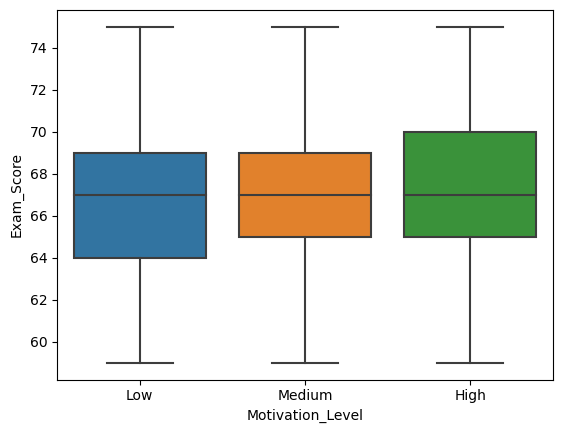

In [48]:
# Exam_Score with Motivation_Level :

print(df.groupby('Motivation_Level')['Exam_Score'].describe())

sns.boxplot(x = 'Motivation_Level', y = 'Exam_Score', data = df)
plt.show()

**Students who have high level of motivation scores high as compared to low esteemed students.**

                  count       mean       std   min   25%   50%   75%   max
Internet_Access                                                           
No                498.0  66.361446  3.311142  59.0  64.0  66.0  69.0  75.0
Yes              6108.0  67.188278  3.369293  59.0  65.0  67.0  70.0  75.0


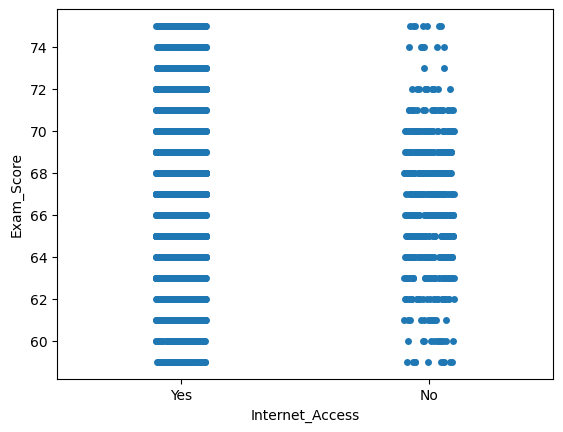

In [49]:
# Exam_Score with Internet_Access :

print(df.groupby('Internet_Access')['Exam_Score'].describe())

sns.stripplot(x = 'Internet_Access', y = 'Exam_Score', data = df)
plt.show()

**Students who have Internet Access do slighlty better than those students who don't have.**

                count       mean       std   min   25%   50%   75%   max
Family_Income                                                           
High           1268.0  67.650631  3.320814  59.0  65.0  68.0  70.0  75.0
Low            2672.0  66.762350  3.363429  59.0  65.0  67.0  69.0  75.0
Medium         2666.0  67.240810  3.364387  59.0  65.0  67.0  70.0  75.0


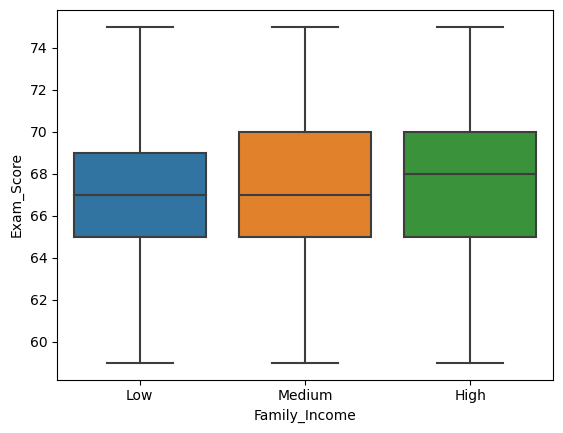

In [50]:
# Exam_Score with Family_Income :

print(df.groupby('Family_Income')['Exam_Score'].describe())

sns.boxplot(x = 'Family_Income', y = 'Exam_Score', data = df)
plt.show()

**Students whose Family Income is high scores slightly high in exams.**

                  count       mean       std   min   25%   50%   75%   max
Teacher_Quality                                                           
High             1946.0  67.534430  3.367483  59.0  65.0  68.0  70.0  75.0
Low               657.0  66.648402  3.370826  59.0  64.0  67.0  69.0  75.0
Medium           4003.0  67.005746  3.355084  59.0  65.0  67.0  69.0  75.0


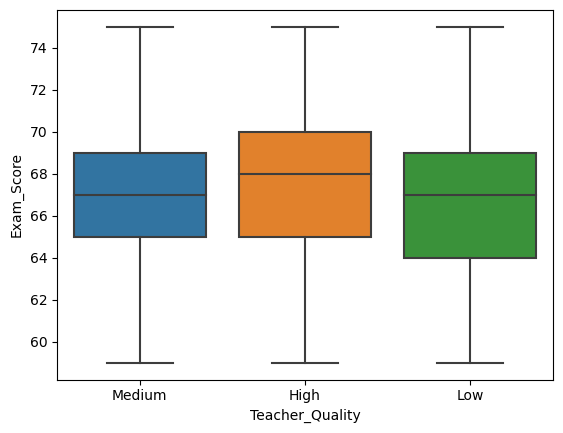

In [51]:
# Exam_Score with Teacher_Quality :

print(df.groupby('Teacher_Quality')['Exam_Score'].describe())

sns.boxplot(x = 'Teacher_Quality', y = 'Exam_Score', data = df)
plt.show()

**Quality of Teacher directly affects the exam scores of students.**

              count       mean       std   min   25%   50%   75%   max
School_Type                                                           
Private      2009.0  67.189647  3.364830  59.0  65.0  67.0  70.0  75.0
Public       4597.0  67.098107  3.374789  59.0  65.0  67.0  69.0  75.0


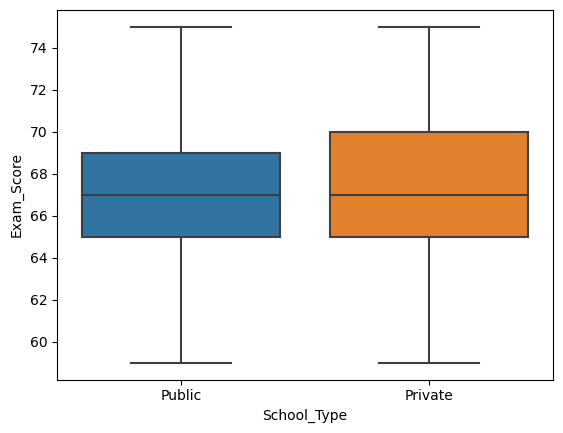

In [52]:
# Exam_Score with School_Type :

print(df.groupby('School_Type')['Exam_Score'].describe())

sns.boxplot(x = 'School_Type', y = 'Exam_Score', data = df)
plt.show()

**Private School students slightly better than Public School students.**

                 count       mean       std   min   25%   50%   75%   max
Peer_Influence                                                           
Negative        1377.0  66.478577  3.333413  59.0  64.0  66.0  69.0  75.0
Neutral         2592.0  67.087963  3.333394  59.0  65.0  67.0  69.0  75.0
Positive        2637.0  67.501327  3.376885  59.0  65.0  67.0  70.0  75.0


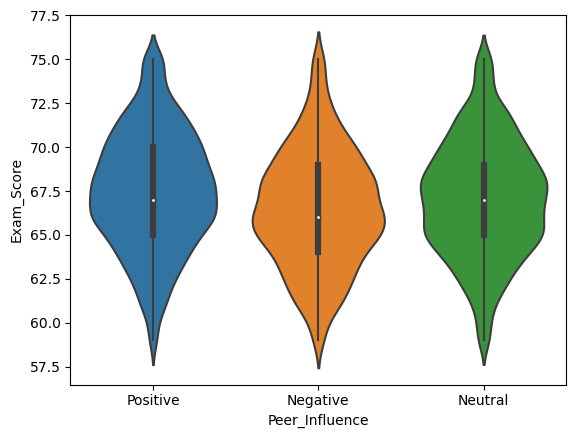

In [53]:
# Exam_Score with Peer_Influence :

print(df.groupby('Peer_Influence')['Exam_Score'].describe())

sns.violinplot(x = 'Peer_Influence', y = 'Exam_Score', data = df)
plt.show()

**Students who have negative Peer Influence scores less than who have neutral or positive Peer influence.**

                        count       mean       std   min   25%   50%   75%  \
Learning_Disabilities                                                        
No                     5911.0  67.240907  3.333493  59.0  65.0  67.0  70.0   
Yes                     695.0  66.148201  3.535684  59.0  64.0  66.0  68.0   

                        max  
Learning_Disabilities        
No                     75.0  
Yes                    75.0  


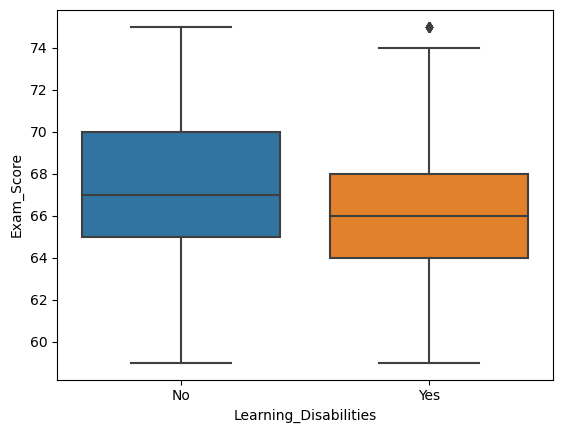

In [54]:
# Exam_Score with Learning_Disabilities :

print(df.groupby('Learning_Disabilities')['Exam_Score'].describe())

sns.boxplot(x = 'Learning_Disabilities', y = 'Exam_Score', data = df)
plt.show()

**Student with Learning Disabilities scores less than who don't have.**

                           count       mean       std   min   25%   50%   75%  \
Parental_Education_Level                                                        
College                   1989.0  67.213172  3.363583  59.0  65.0  67.0  70.0   
High School               3312.0  66.780797  3.387706  59.0  64.0  67.0  69.0   
Postgraduate              1305.0  67.868966  3.214064  59.0  66.0  68.0  70.0   

                           max  
Parental_Education_Level        
College                   75.0  
High School               75.0  
Postgraduate              75.0  


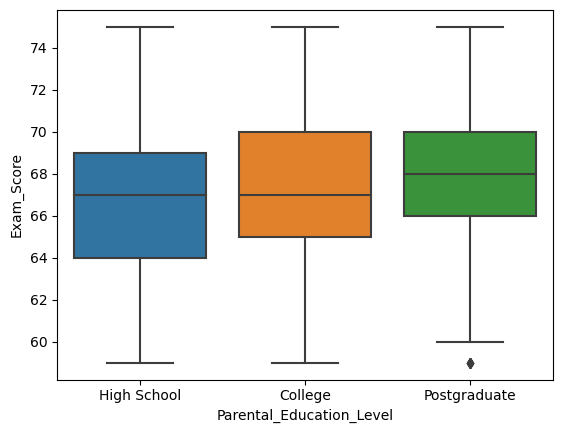

In [55]:
# Exam_Score with Parental_Education_Level :

print(df.groupby('Parental_Education_Level')['Exam_Score'].describe())

sns.boxplot(x = 'Parental_Education_Level', y = 'Exam_Score', data = df)
plt.show()

**Parental Educational Level impact Students exam score directly, i.e Students whose Parental Educational Level is high scores high marks in exams.**

                     count       mean       std   min   25%   50%   75%   max
Distance_from_Home                                                           
Far                  658.0  66.331307  3.475895  59.0  64.0  66.0  68.0  75.0
Moderate            1997.0  66.883325  3.322044  59.0  65.0  67.0  69.0  75.0
Near                3951.0  67.380916  3.350259  59.0  65.0  67.0  70.0  75.0


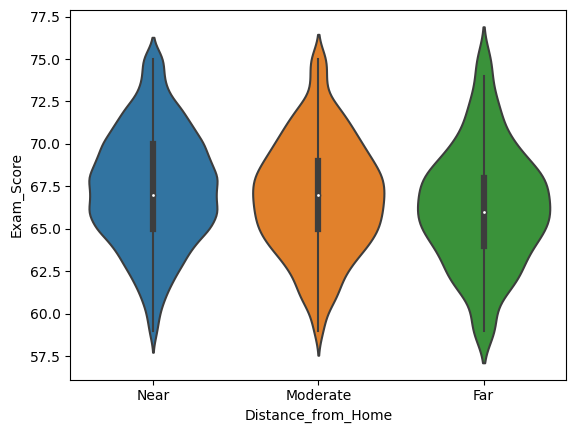

In [56]:
# Exam_Score with Distance_from_Home :

print(df.groupby('Distance_from_Home')['Exam_Score'].describe())

sns.violinplot(x = 'Distance_from_Home', y = 'Exam_Score', data = df)
plt.show()

**Students who come school from Near or Moderate distance scores high than those who comes from far.**

         count       mean       std   min   25%   50%   75%   max
Gender                                                           
Female  2792.0  67.107092  3.407633  59.0  65.0  67.0  69.0  75.0
Male    3814.0  67.139748  3.345657  59.0  65.0  67.0  69.0  75.0


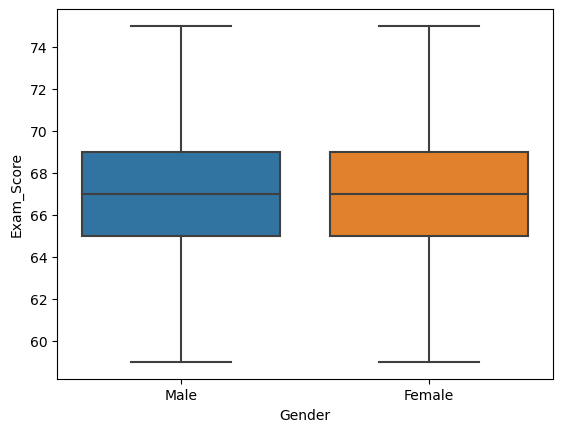

In [57]:
# Exam_Score with Gender :

print(df.groupby('Gender')['Exam_Score'].describe())

sns.boxplot(x = 'Gender', y = 'Exam_Score', data = df)
plt.show()

**Female students are at par with their male counterparts, i.e Both male and female students score ***Equally***.**

              count       mean       std   min   25%   50%   75%   max
Sleep_Hours                                                           
4             309.0  67.339806  3.453457  59.0  65.0  67.0  69.0  75.0
5             695.0  67.231655  3.400225  59.0  65.0  67.0  69.5  75.0
6            1375.0  67.080000  3.371600  59.0  65.0  67.0  69.0  75.0
7            1741.0  67.126364  3.406232  59.0  65.0  67.0  69.0  75.0
8            1399.0  67.132237  3.268891  59.0  65.0  67.0  69.0  75.0
9             775.0  67.027097  3.433087  59.0  65.0  67.0  69.0  75.0
10            312.0  67.096154  3.351400  59.0  65.0  67.0  70.0  75.0


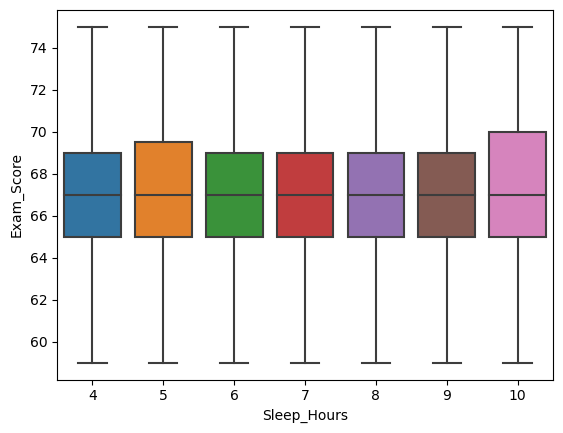

In [58]:
# Relation Between Exam_Score & Sleep_Hours.

print(df.groupby('Sleep_Hours')['Exam_Score'].describe())

sns.boxplot(x = 'Sleep_Hours', y = 'Exam_Score', data = df)
plt.show()

**Sleeping habits of students doen't have much effect on exam scores.**

                    count       mean       std   min    25%   50%    75%   max
Tutoring_Sessions                                                             
0                  1513.0  66.411104  3.430749  59.0  64.00  66.0  69.00  75.0
1                  2179.0  66.869665  3.317800  59.0  65.00  67.0  69.00  75.0
2                  1649.0  67.439054  3.276880  59.0  65.00  67.0  70.00  75.0
3                   836.0  67.805024  3.243274  59.0  66.00  68.0  70.00  75.0
4                   301.0  68.119601  3.104671  59.0  66.00  68.0  70.00  75.0
5                   102.0  68.696078  3.469212  60.0  66.00  68.5  71.00  75.0
6                    18.0  71.333333  3.804023  64.0  67.75  72.5  74.75  75.0
7                     7.0  69.857143  4.099942  63.0  68.00  71.0  72.00  75.0
8                     1.0  69.000000       NaN  69.0  69.00  69.0  69.00  69.0


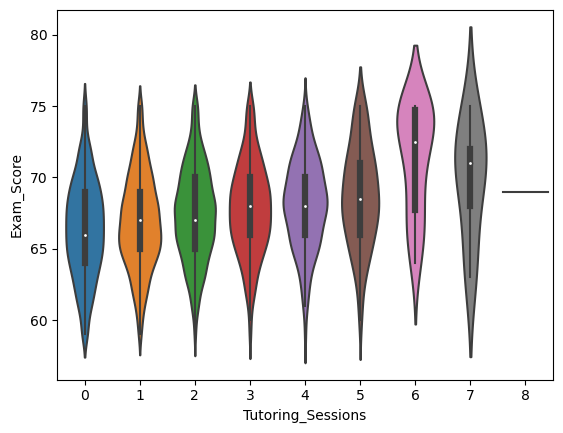

In [59]:
# Relation Between Exam_Score & Tutoring_Sessions.

print(df.groupby('Tutoring_Sessions')['Exam_Score'].describe())

sns.violinplot(x = 'Tutoring_Sessions', y = 'Exam_Score', data = df)
plt.show()

**As number of Tutoring Sessions increase , marks of students also saw increment.**

                    count       mean       std   min    25%   50%   75%   max
Physical_Activity                                                            
0                    46.0  67.434783  3.709760  59.0  65.25  68.0  70.0  75.0
1                   421.0  66.838480  3.523735  59.0  64.00  67.0  69.0  75.0
2                  1627.0  67.028273  3.420212  59.0  65.00  67.0  69.0  75.0
3                  2544.0  67.104560  3.310999  59.0  65.00  67.0  69.0  75.0
4                  1575.0  67.236190  3.342588  59.0  65.00  67.0  70.0  75.0
5                   361.0  67.445983  3.412883  59.0  65.00  67.0  70.0  75.0
6                    32.0  68.093750  3.753359  61.0  65.00  68.0  71.0  75.0


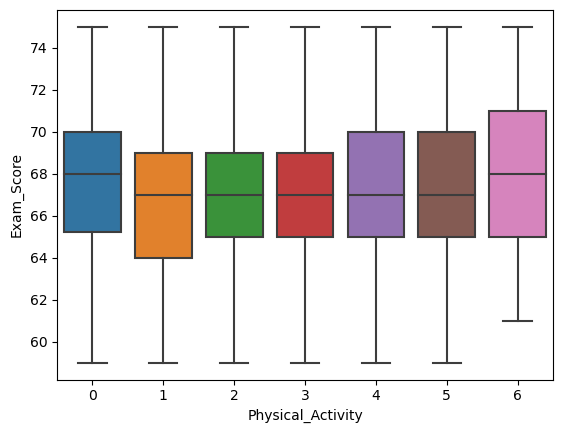

In [60]:
# Relation Between Exam_Score & Physical_Activity.

print(df.groupby('Physical_Activity')['Exam_Score'].describe())

sns.boxplot(x = 'Physical_Activity', y = 'Exam_Score', data = df)
plt.show()

**Physical Activity don't have intense effect on students marks.**

<Axes: >

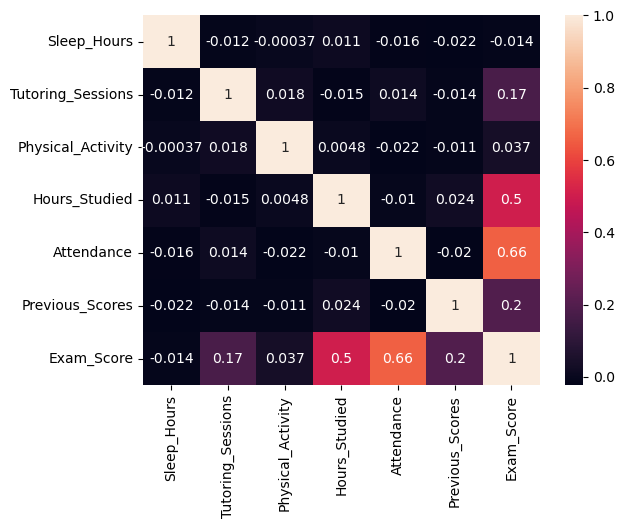

In [61]:
correlation_matrix = df[count_cols + conti_cols].corr()
sns.heatmap(correlation_matrix,annot=True)

**Exam score Majorly depends on 2 factors:**
  - Attendance
  - Hours Studied
  
**Exam score Minorly depends on 3 factors:**
  - Previous Scores
  - Tutoring Sessions
  - Physical Activity

# Objective

**From Above we can Conclude:**

# Most Important Factors Affecting Student's Performance : 

- **Hours Studied, Attendance**
- **Parental Involvement, Parental Education Level**
- **Extracurricular Activities, Motivation Levels**
- **Tutoring Sessions, Teacher Quality**
- **Accessability of Resources & Distance from Home.**

# Actionable Recommendations to Inhance Academic Outcomes:

- **Parents must encourage childrens to study for more number of Hours by giving some tasks and rewards.** 
- **School Administration can encourage students to attend more number of classes by making classroom more interactive.**
- **Teachers can discuss importance of Parental Involvement in students education in PTMs.**
- **School must organize different types Extracurricular Activities so that most students take part according to their choice.**
- **School must do Motivational seminars on regular basis to boost student's Motivation Levels.**
- **School can encourage students to Attend more Tutoring session by telling their importance in class.**
- **School Administration must focus on Increasing Educational Quality of Teachers.** 
- **School can identify the students who don't have Resources and can help them.**
- **To counter Demographic factor district administration can provide Bus facilty.**

# By implementing above recommendations we can Improve Student's Academic Performance.